In [23]:
import torch
import torch.nn as nn


In [28]:
seed = torch.manual_seed(0)
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
w = torch.randn((5,4),requires_grad=True)
t = torch.tensor([1.0, 0.0, 0.0, 1.0, 0.0])
x, w, t

(tensor([1., 2., 3., 4.], requires_grad=True),
 tensor([[-1.1258, -1.1524, -0.2506, -0.4339],
         [ 0.5988, -1.5551, -0.3414,  1.8530],
         [ 0.4681, -0.1577,  1.4437,  0.2660],
         [ 1.3894,  1.5863,  0.9463, -0.8437],
         [ 0.9318,  1.2590,  2.0050,  0.0537]], requires_grad=True),
 tensor([1., 0., 0., 1., 0.]))

In [29]:
loss = nn.functional.mse_loss(w@x, t)
loss

tensor(39.3036, grad_fn=<MseLossBackward0>)

In [30]:
loss.backward(create_graph=True)

In [33]:
loss

/var/folders/gz/05t9cqs57_j2xs19hrgvx7c40000gn/T/ipykernel_75144/3355736690.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  loss.grad


In [34]:

"""
    https://colab.research.google.com/drive/1bycbm85pTwnL7Izw5WHpdvkA63rdedE6
"""

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from pylab import rcParams

# %matplotlib inline

rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 1251

np.random.seed(RANDOM_SEED)

from matplotlib import rc
rc('animation', html='jshtml')


In [35]:

"""# Data and plotting

Code to randomly generate random, linearly separable training data
"""

def generateData(n):
  """
  Create two Gaussians that (probably) do not overlap.
  """
  # sample 2D points from each Gaussian
  classA = np.random.multivariate_normal([1.0, 1.0],
                                         [[0.1, 0.0], [0.0, 0.5]],
                                         n//2)

  classB = np.random.multivariate_normal([-1.0, 1.0],
                                         [[0.1, 0.0], [0.0, 0.5]],
                                         n//2)
  X = np.concatenate([classA, classB], axis=0)

  # create the labels (1 and 0)
  labelsA = np.ones([n//2, 1])
  labelsB = np.zeros([n//2, 1])
  labels = np.concatenate([labelsA, labelsB], axis=0)

  # add a 1 for the bias term
  bias = np.ones([n, 1])

  # put everything together
  data = np.concatenate([bias, X, labels], axis=-1)
  return data


def plotData(data, w, idx=None):
  """
  Plot the data points and the separating hyperplane. If `idx` is given
  this data point is highlighted.
  """
  plt.clf()
  plt.axis([-2.5,2.5,-2.5,4.0])
  for i,x in enumerate(data):
    plt.plot(x[1], x[2], 'ob' if (x[3] > 0.0) else 'or')
    if idx is not None and idx == i:
      plt.plot(x[1], x[2], 'og', markersize=15)
  plotHyperPlane(w)


def plotHyperPlane(w):
  """
  Plot the hyperplane and shade each side according to its class.
  """
  b = w[0]
  m = -w[1] / w[2]
  c = -b / w[2]
  x = np.array([-3, 3])
  y = np.array([-3*m + c, 3*m + c])
  p1 = plt.plot(x, y,'--k')[0]

  plt.fill_between(x, y, 4*np.sign(w[2]), interpolate=True, color='b', alpha=0.25)
  plt.fill_between(x, y, -4*np.sign(w[2]), interpolate=True, color='r', alpha=0.25)

  return p1


In [36]:

"""# Perceptron class"""

class Perceptron:
  def __init__(self):
    """ perceptron initialization """
     # initialize weights; here set to arbitrary value so the decision boundary can be rendered during the first iteration
    self.w = np.array([0.2, -0.1, -0.1])
    self.learningRate = 0.1
    self.maxIterations = 100

  def prediction(self,x):
    """
    perceptron output
    (w^Tx > 0) => 1 else 0
    """
    f = np.dot(self.w, x[:3])
    return 1.0 if f > 0.0 else 0.0

  def updateWeights(self,x,residual):
    """
    updates the weights via update rule:
    w(t+1) = w(t) + learningRate*(y-yhat)*x
    """
    self.w += self.learningRate*residual*x[:3]

  def train(self,data):
    """
    Every vector in data must have three elements (bias,data),
    the forth element (x[3]) must be the label (desired output)
    """
    iteration = 0
    weights = [(None, np.copy(self.w))]  # used for visualization only
    while iteration < self.maxIterations:
      globalError = 0.0

      for i, x in enumerate(data):  # for each sample
        yhat = self.prediction(x)
        residual = x[3] - yhat
        if abs(residual) > 0.0:  # if the prediction is wrong
          self.updateWeights(x, residual)
          print('index ', i, ' prediction ', yhat, ' label ', x[3], ' residual ', residual)
          weights.append((i, np.copy(self.w)))  # store intermediate weights for visualization
          globalError += abs(residual)
          break  # not strictly necessary, makes iteration count consistent

      iteration += 1

      if globalError == 0.0:  # stopping criteria
        print('stopped after {} iterations'.format(iteration))
        weights.append((None, np.copy(self.w)))  # store final weights for visualization
        return weights

    print('did not converge after {} iterations'.format(iteration))
    return weights


index  3  prediction  0.0  label  1.0  residual  1.0
index  150  prediction  1.0  label  0.0  residual  -1.0
index  4  prediction  0.0  label  1.0  residual  1.0
index  150  prediction  1.0  label  0.0  residual  -1.0
index  196  prediction  1.0  label  0.0  residual  -1.0
index  293  prediction  1.0  label  0.0  residual  -1.0
index  14  prediction  0.0  label  1.0  residual  1.0
index  293  prediction  1.0  label  0.0  residual  -1.0
index  14  prediction  0.0  label  1.0  residual  1.0
index  293  prediction  1.0  label  0.0  residual  -1.0
index  46  prediction  0.0  label  1.0  residual  1.0
index  166  prediction  1.0  label  0.0  residual  -1.0
stopped after 13 iterations


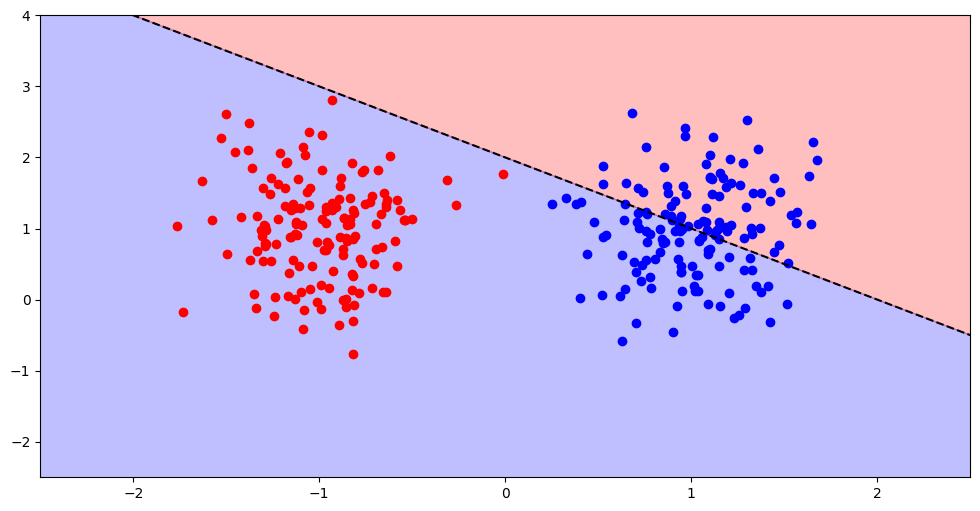

In [37]:

"""# Testing
Generate random train and test set then train a perceptron
"""

trainset = generateData(300)  # train set generation
perceptron = Perceptron()
plotData(trainset, perceptron.w)
weights = perceptron.train(trainset)  # training


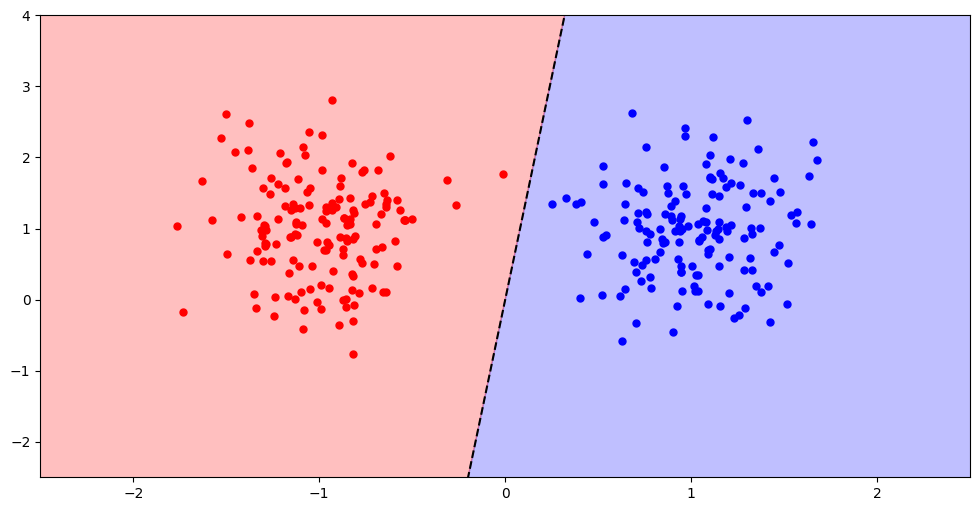

In [38]:

# animate the training progress
fig = plt.figure()
plt.axis([-2.5,2.5,-2.5,4.0])

# get point and line objects that we want to animate
all_points = []
for i, x in enumerate(trainset):
  p, = plt.plot(x[1], x[2], 'ob' if (x[3] > 0.0) else 'or')
  all_points.append(p)

hyperplane = plotHyperPlane(weights[0][1])

# update function that is running every loop
def animate(num, points, hyperplane, data, idx_and_weights):
  # get weights and error point index for current frame
  idx, w = idx_and_weights[num]

  # plot the data, highlighting the point that updated the plane
  for i, p in enumerate(points):
    c = 'b' if (data[i][3] == 1.0) else 'r'
    p.set_color(c)
    p.set_markersize(5)
    if idx is not None and idx == i:
      p.set_color('g')
      p.set_markersize(15)

  # update location of hyperplane
  w = w / np.linalg.norm(w)
  b = w[0]
  m = -w[1] / w[2]
  c = -b / w[2]
  x = np.array([-3, 3])
  y = np.array([-3*m + c, 3*m + c])
  hyperplane.set_data(np.array([x, y]))

  # update background shading
  ax = fig.axes[0]
  for c in ax.collections:
    c.remove()
  ax.fill_between(x, y, 4*np.sign(w[2]), interpolate=True, color='b', alpha=0.25)
  ax.fill_between(x, y, -4*np.sign(w[2]), interpolate=True, color='r', alpha=0.25)

  return points

anim = animation.FuncAnimation(fig, animate, frames=len(weights),
                               fargs=(all_points, hyperplane, trainset, weights),
                               interval=1000, blit=True)

rc('animation', html='jshtml')
anim


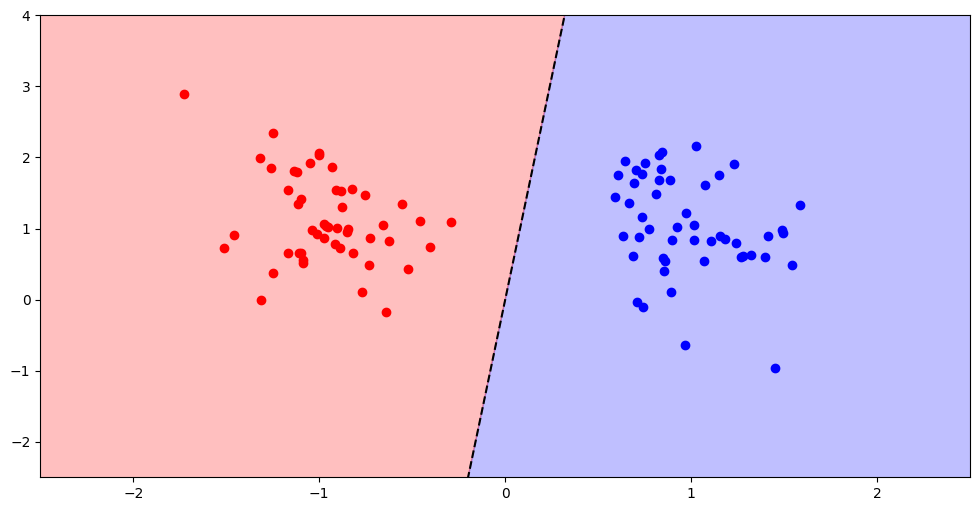

In [40]:

testset = generateData(100)  # test set generation
plotData(testset, perceptron.w)

# print if there are any errors
for x in testset:
  r = perceptron.prediction(x)
  if np.abs(r - x[3]) > 0.0:
    print('error')

# Pytorch basics

In [59]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1575.9647216796875
199 1097.149658203125
299 765.314697265625
399 535.1193237304688
499 375.28192138671875
599 264.19635009765625
699 186.9244842529297
799 133.12796020507812
899 95.643798828125
999 69.50494384765625
1099 51.26366424560547
1199 38.524314880371094
1299 29.621150970458984
1399 23.394773483276367
1499 19.037548065185547
1599 15.98651123046875
1699 13.848822593688965
1799 12.3502197265625
1899 11.299092292785645
1999 10.56144905090332
Result: y = 0.04197040945291519 + 0.8439897894859314 x + -0.007240592036396265 x^2 + -0.0915166586637497 x^3


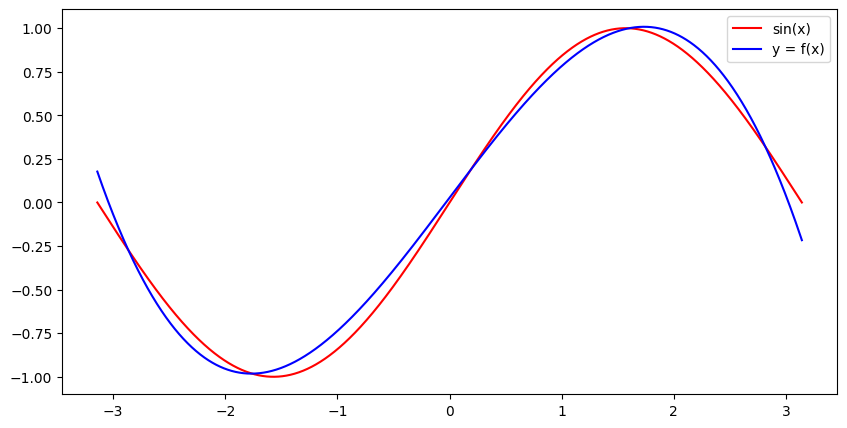

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(x, y, 'r', label='sin(x)')
plt.plot(x, y_pred.detach().numpy(), 'b', label='y = f(x)')
plt.legend()
plt.show()

In [76]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

optimizer = torch.optim.SGD([a, b, c, d], lr=1e-6, momentum=0.9)

for t in range(2000):
    # zero the gradients
    optimizer.zero_grad()
    
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()

    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()
    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    optimizer.step()

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 17.54201316833496
199 8.90548038482666
299 8.818244934082031
399 8.817181587219238
499 8.817167282104492
599 8.817166328430176
699 8.817167282104492
799 8.817167282104492
899 8.817167282104492
999 8.817167282104492
1099 8.817167282104492
1199 8.817167282104492
1299 8.817167282104492
1399 8.817167282104492
1499 8.817167282104492
1599 8.817167282104492
1699 8.817167282104492
1799 8.817167282104492
1899 8.817167282104492
1999 8.817167282104492
Result: y = 3.93559318467851e-09 + 0.856741726398468 x + 1.0809716677329106e-08 x^2 + -0.0933305025100708 x^3
